<a href="https://colab.research.google.com/github/ssreeramj/market-mix-modeling-practice/blob/main/market_mix_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# prompt: all important imports for data science project

# Data analysis and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Others
import json
import os
import time

from pprint import pprint


In [51]:
df = pd.read_csv('daily_df.csv').iloc[:, 1:]

In [3]:
# prompt: ignore the first column while reading the csv data

df = pd.read_csv('daily_df.csv').iloc[:, 1:]

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  730 non-null    object 
 1   total_revenue         730 non-null    float64
 2   impressions_Facebook  730 non-null    float64
 3   impressions_TV        730 non-null    float64
 4   clicks_Search         730 non-null    float64
 5   spend_Facebook        730 non-null    float64
 6   spend_TV              730 non-null    float64
 7   spend_Search          730 non-null    float64
dtypes: float64(7), object(1)
memory usage: 45.8+ KB


,DATE,total_revenue,impressions_Facebook,impressions_TV,clicks_Search,spend_Facebook,spend_TV,spend_Search
0,2017-01-01,422031.701163,3.140716e+07,1.474374e+06,229873.055636,93985.852515,29371.949764,59038.433147
1,2017-01-02,676144.319545,7.050865e+07,3.723714e+06,416642.506045,211906.458174,74499.644639,116332.706258
2,2017-01-03,591546.200346,3.795266e+07,2.519856e+06,300880.301294,114443.291036,51103.495105,80765.136367
3,2017-01-04,643879.898970,7.521011e+07,3.777401e+06,639414.666386,226736.264003,75500.427655,158791.848744
4,2017-01-05,627901.193417,7.776720e+07,4.220938e+06,523006.698290,230999.084236,85157.369044,134027.957518


In [52]:
df.describe()

,total_revenue,impressions_Facebook,impressions_TV,clicks_Search,spend_Facebook,spend_TV,spend_Search
count,7.300000e+02,7.300000e+02,7.300000e+02,730.000000,730.000000,730.000000,730.000000
mean,1.019738e+06,5.363883e+07,3.195442e+06,375332.469530,160905.537912,64067.918228,97480.785312
std,3.243134e+05,1.687829e+07,1.122351e+06,127483.437227,50644.076135,22498.644602,32986.392875
min,9.758149e+04,4.967786e+06,2.246768e+05,32751.569443,14871.379254,4477.858379,8742.481615
25%,7.965674e+05,4.248753e+07,2.424497e+06,289499.672332,127032.945952,48785.449685,75423.327266
50%,1.022460e+06,5.316860e+07,3.100043e+06,371952.994443,159502.421752,62161.498645,96781.863049
75%,1.242476e+06,6.514951e+07,3.903806e+06,455861.226558,195083.443179,78308.698464,118409.232017
max,1.780834e+06,1.014115e+08,7.159935e+06,813602.077557,304072.671153,144122.647766,217167.903510


In [53]:
original_features = ["impressions_Facebook", "impressions_TV", "clicks_Search"]
target_feature = "total_revenue"

In [9]:
X = df[original_features]
y = df[target_feature]

In [68]:
# prompt: Write a modular function that takes as input the the sklearn estimator, the x and the y, and returns cross validated scores

from sklearn.model_selection import cross_validate

def cross_val_score_module(estimator, x, y):
    """
    This function takes as input an estimator, the x and the y, and returns cross validated scores.

    Args:
    estimator: A sklearn estimator.
    x: The features.
    y: The target.

    Returns:
    A dictionary with the cross validated scores.
    """

    scores = cross_validate(
        estimator,
        x,
        y,
        scoring='r2',
        cv=5,
        return_train_score=True
    )

    print(f"Mean Train Score: {scores['train_score'].mean():.3f}")
    print(f"Mean Test Score: {scores['test_score'].mean():.3f}")

    return scores


In [62]:
# prompt: write a function to create all possible features from a date column

def create_date_features(df, date_column):
  """
  This function takes as input a dataframe and a date column and returns a dataframe with all possible features created from the date column.

  Args:
    df: The pandas dataframe.
    date_column: The name of the date column.

  Returns:
    A pandas dataframe with all possible features created from the date column.
  """
  df[date_column] = pd.to_datetime(df[date_column])

#   df['weekday'] = df[date_column].dt.day_name()
  df['day'] = df[date_column].dt.day
  df['month'] = df[date_column].dt.month
  df['year'] = df[date_column].dt.year
  df['weekofyear'] = df[date_column].dt.isocalendar().week
  df['quarter'] = df[date_column].dt.quarter

  return df

date_features = ['day', 'month', 'year', 'weekofyear', 'quarter']

In [111]:
pipeline = make_pipeline(
    # StandardScaler(),
    LinearRegression(),
)

In [112]:
df = create_date_features(df, date_column="DATE")

In [139]:
X = df[original_features]
y = df[target_feature]

print(X.shape, y.shape)

(730, 3) (730,)


In [140]:
s = cross_val_score_module(Ridge(alpha=10), X, y)

Mean Train Score: 0.009
Mean Test Score: -1.996


In [141]:
# prompt: get the coeffieients after training the pipeline on X and y

pipeline.fit(X, y)
coefficients = pipeline.named_steps['linearregression'].coef_
intercept = pipeline.named_steps['linearregression'].intercept_
coef_df = pd.DataFrame({"features": X.columns, "coefficients": coefficients})
coef_df.sort_values(by="coefficients", ascending=False).reset_index(drop=True)


,features,coefficients
0,clicks_Search,0.063100
1,impressions_Facebook,0.002088
2,impressions_TV,-0.015299


In [124]:
coefficients.shape
intercept

-915659244.1057304

In [117]:
X.shape

(730, 8)

In [142]:
attrib_df = X * coefficients
attrib_df["base"] = intercept
attrib_df

,impressions_Facebook,impressions_TV,clicks_Search,base
0,65580.707460,-22557.142251,14504.924059,932940.529778
1,147227.823097,-56970.863121,26290.022958,932940.529778
2,79248.245689,-38552.467334,18985.460950,932940.529778
3,157044.849657,-57792.245917,40346.882555,932940.529778
4,162384.262063,-64578.132646,33001.573065,932940.529778
...,...,...,...,...
725,73725.189724,-25383.750998,17875.512933,932940.529778
726,63829.150145,-34411.285790,14229.880982,932940.529778
727,138919.607554,-63127.354449,30133.463668,932940.529778
728,149905.430090,-62489.010919,33141.456616,932940.529778


In [143]:
attrib_df.sum(axis=1)

0      9.904690e+05
1      1.049488e+06
2      9.926218e+05
3      1.072540e+06
4      1.063748e+06
           ...     
725    9.991575e+05
726    9.765883e+05
727    1.038866e+06
728    1.053498e+06
729    1.010772e+06
Length: 730, dtype: float64

In [144]:
y

0      4.220317e+05
1      6.761443e+05
2      5.915462e+05
3      6.438799e+05
4      6.279012e+05
           ...     
725    1.340701e+06
726    1.362870e+06
727    1.265575e+06
728    1.536753e+06
729    1.425762e+06
Name: total_revenue, Length: 730, dtype: float64

In [145]:
roi = attrib_df[['impressions_Facebook', 'impressions_TV', 'clicks_Search']].values / df[["spend_Facebook", "spend_TV", "spend_Search"]].values
roi

array([[ 0.69777212, -0.76798246,  0.24568613],
       [ 0.69477742, -0.76471322,  0.22598995],
       [ 0.69246738, -0.75439982,  0.23507   ],
       ...,
       [ 0.69582852, -0.75918256,  0.23475062],
       [ 0.69812436, -0.7633773 ,  0.24493421],
       [ 0.69362239, -0.76395418,  0.2546203 ]])

In [146]:
np.mean(roi, axis=0)

array([ 0.6960958 , -0.7630621 ,  0.24297161])

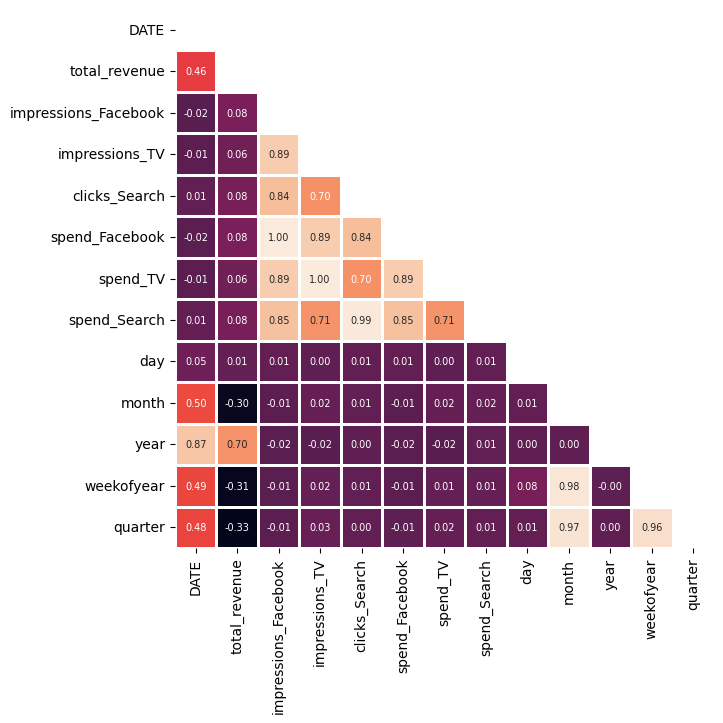

In [86]:
corr = df.corr()
mask = np.triu(corr)

plt.figure(figsize=(7, 7))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    linewidths=1,
    fmt=".2f",
    square=True,
    annot_kws={"fontsize": 7},
    cbar=False
)
plt.show()